0716_Ob 1 area: 4013.0
0716_Ob 2 area: 4207.0
0716_Ob 3 area: 2531.0
0716_Ob 4 area: 3008.0
0716_Ob 5 area: 5196.0
0716_Ob 6 area: 5060.0
0716_Ob 7 area: 2281.0
0716_Ob 8 area: 3431.0
0716_Ob 9 area: 5119.0
0716_Ob 10 area: 4476.0
0716_Ob 11 area: 3449.0
0716_Ob 12 area: 2635.0
0716_Ob 13 area: 3338.0
0716_Ob 14 area: 3369.0
0716_Ob 15 area: 5100.0
0716_Ob 16 area: 3236.0
0716_Ob 17 area: 3586.0
0716_Ob 18 area: 343653.0
0716_Ob 19 area: 4185.0
0716_Ob 20 area: 3048.0
0716_Ob 21 area: 4274.0
0716_Ob 22 area: 4345.0
0716_Ob 23 area: 5463.0
0716_Ob 24 area: 3506.0
0716_Ob 25 area: 2809.0
0716_Ob 26 area: 4524.0
0716_Ob 27 area: 2597.0
0716_Ob 28 area: 6059.0
0716_Ob 29 area: 6815.0
0716_Ob 30 area: 7317.0
0716_Ob 31 area: 4485.0
0716_Ob 32 area: 5937.0
0716_Ob 33 area: 6265.0
0716_Ob 34 area: 8176.0
0716_Ob 35 area: 3464.0
0716_Ob 36 area: 3000.0
0716_Ob 37 area: 6525.0
0716_Ob 38 area: 5094.0
0716_Ob 39 area: 5313.0


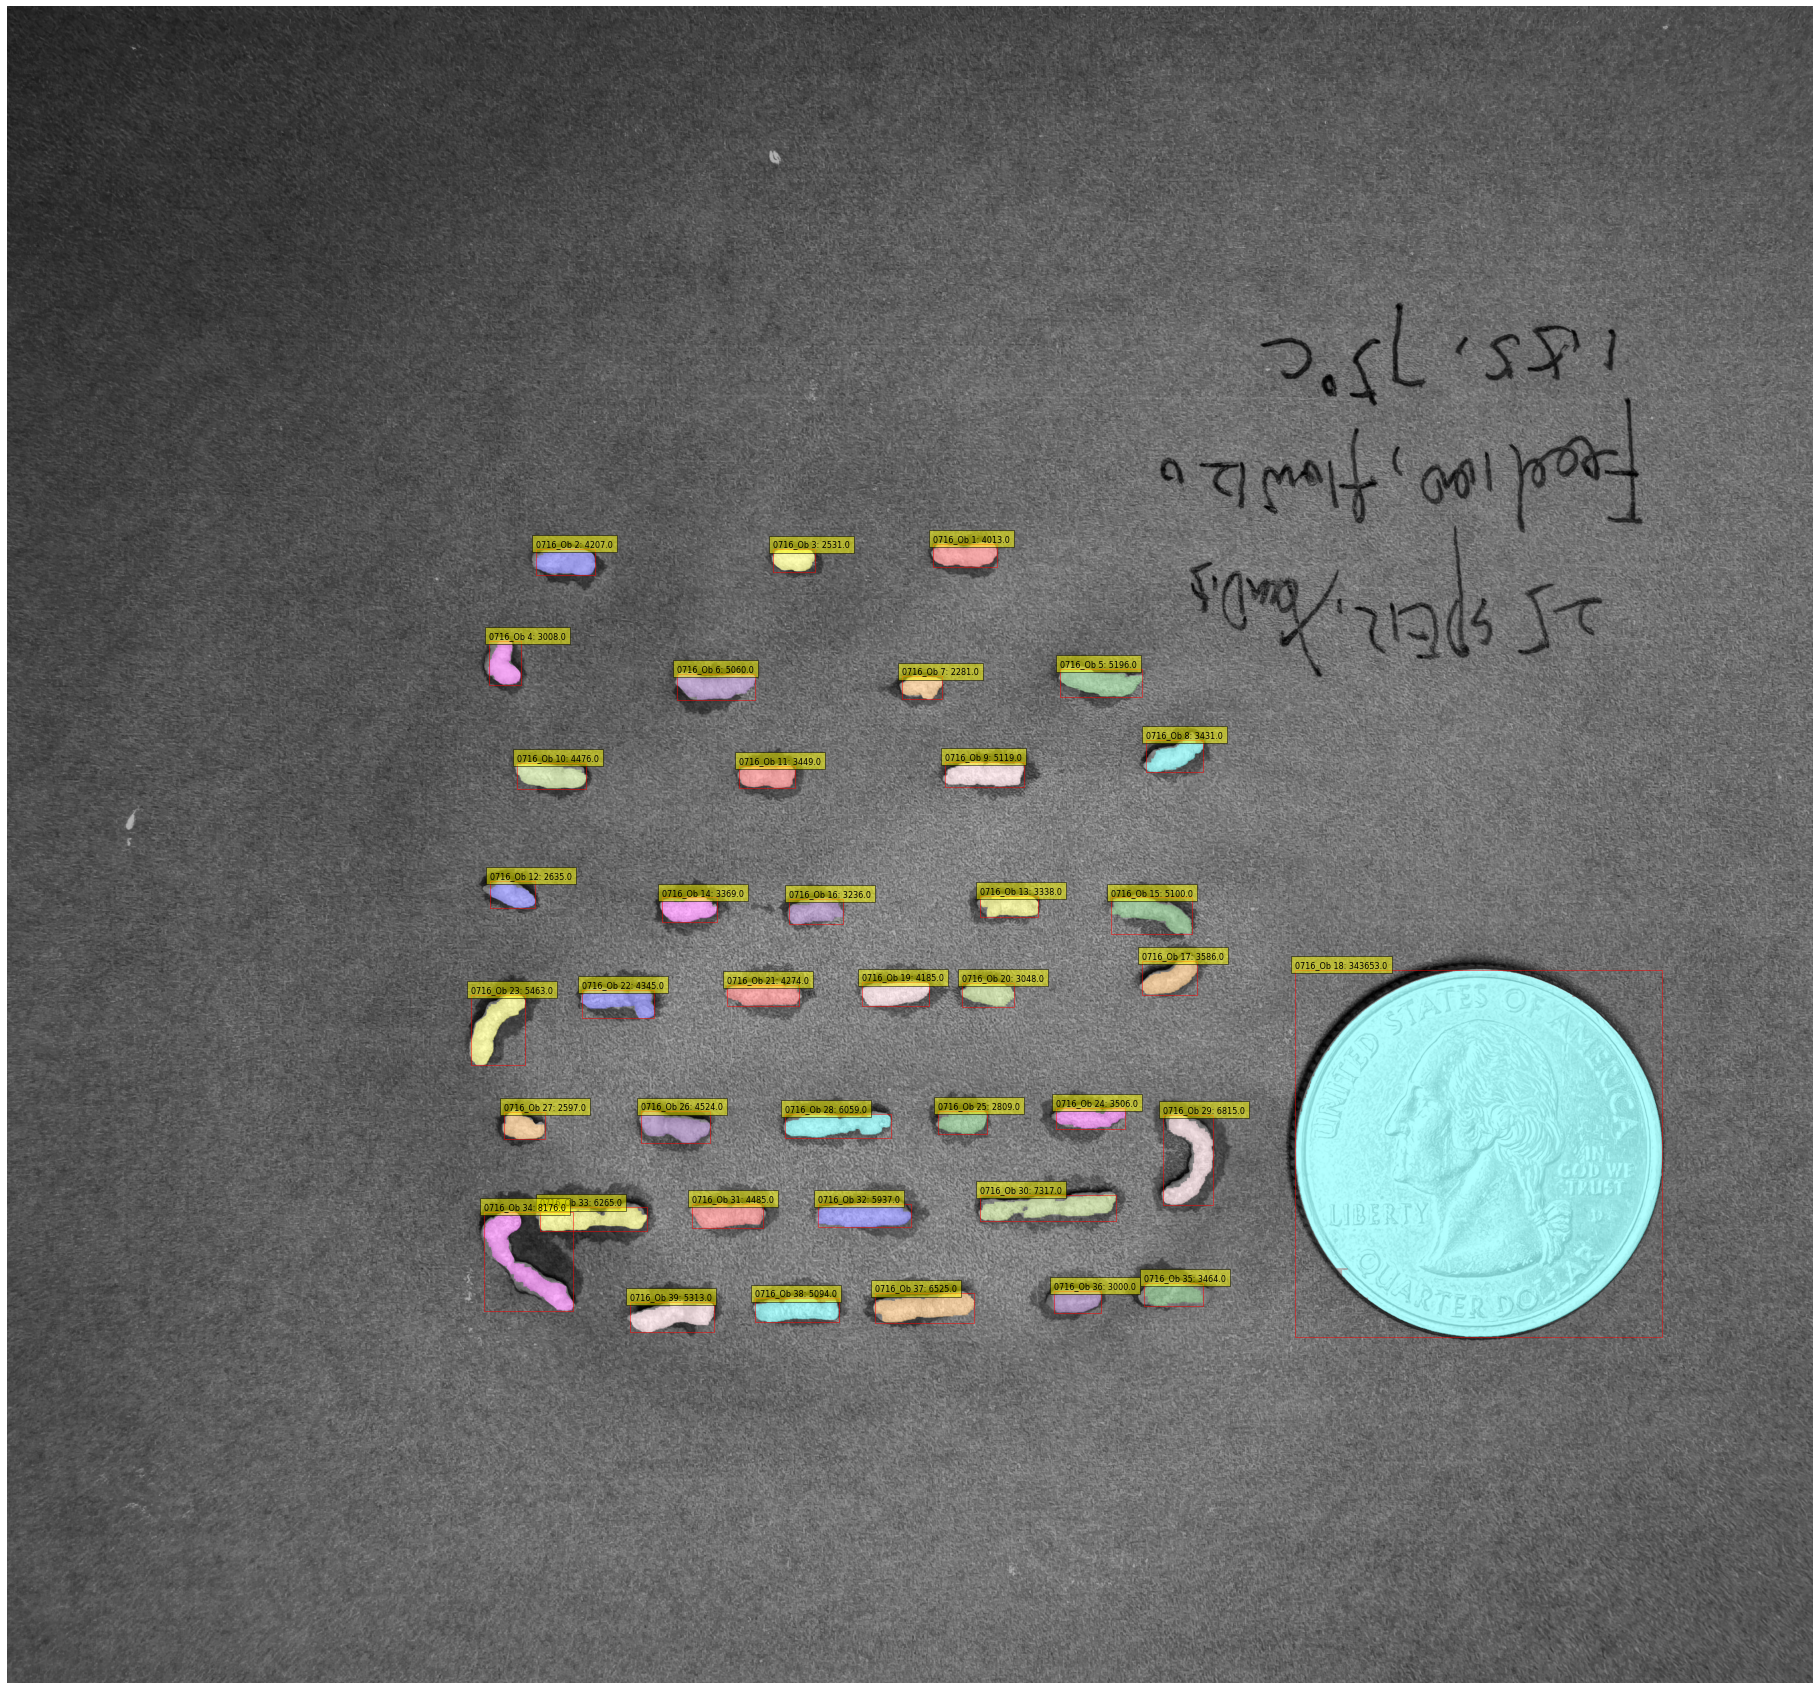

In [27]:
# Initial thresholding
_, binary2 = cv2.threshold(gray, 163,255, cv2.THRESH_BINARY)

# Use morphological open to remove small noise
kernel_open = np.ones((10, 18), np.uint8)
binary2 = cv2.morphologyEx(binary2, cv2.MORPH_OPEN, kernel_open)

# Apply morphological closing to merge split parts
kernel_close = np.ones((3, 5), np.uint8)
binary2 = cv2.morphologyEx(binary2, cv2.MORPH_CLOSE, kernel_close)


label_image = label(binary2)
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

# Get image dimensions and set up figure for visualization
height, width, _ = image.shape
fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=72)
ax.imshow(image_label_overlay)
object_counter = 1
for region in regionprops(label_image):
    if region.area > 500:
        # Get the bounding box coordinates
        minr, minc, maxr, maxc = region.bbox
        object_name = f'0716_Ob {object_counter}'
        object_counter += 1
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=0.5)
        ax.add_patch(rect)
        print(f'{object_name} area: {region.area}')
        ax.text(minc, minr - 5, f'{object_name}: {region.area}', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8, color='black')
ax.set_axis_off()
plt.savefig('dete.op_0716.jpg', dpi=72, bbox_inches='tight', pad_inches=0)
plt.show()